# 2016 MLB 分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("baseball_reference_2016_scrape.csv")
df

,觀眾人數,客隊名稱,客隊失誤數,客隊安打數,客隊得分,比賽紀錄連結,比賽日期,場地類型,比賽時間,比賽類型,主隊名稱,主隊失誤數,主隊安打數,主隊得分,其他資訊,開賽時間,球場名稱
0,"40,030']",New York Mets,1,7,3,https://www.baseball-reference.com/boxes/KCA/K...,"Sunday, April 3, 2016",NaN,: 3:13,"Night Game, on grass",Kansas City Royals,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:38 p.m. Local,: Kauffman Stadium
1,"21,621']",Philadelphia Phillies,0,5,2,https://www.baseball-reference.com/boxes/CIN/C...,"Wednesday, April 6, 2016",NaN,: 2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:11 p.m. Local,: Great American Ball Park
2,"12,622']",Minnesota Twins,0,5,2,https://www.baseball-reference.com/boxes/BAL/B...,"Wednesday, April 6, 2016",NaN,: 3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:07 p.m. Local,: Oriole Park at Camden Yards
3,"18,531']",Washington Nationals,0,8,3,https://www.baseball-reference.com/boxes/ATL/A...,"Wednesday, April 6, 2016",NaN,: 2:53,"Night Game, on grass",Atlanta Braves,1,8,1,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:10 p.m. Local,: Turner Field
4,"18,572']",Colorado Rockies,1,8,4,https://www.baseball-reference.com/boxes/ARI/A...,"Wednesday, April 6, 2016",NaN,: 2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:40 p.m. Local,: Chase Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,"31,042']",Toronto Blue Jays,2,7,5,https://www.baseball-reference.com/boxes/TBA/T...,"Sunday, April 3, 2016",NaN,: 2:51,"Day Game, on turf",Tampa Bay Rays,1,7,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 4:09 p.m. Local,: Tropicana Field
2459,"39,500']",St. Louis Cardinals,0,5,1,https://www.baseball-reference.com/boxes/PIT/P...,"Sunday, April 3, 2016",NaN,: 3:02,"Day Game, on grass",Pittsburgh Pirates,1,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 1:15 p.m. Local,: PNC Park
2460,"20,098']",San Francisco Giants,0,6,3,https://www.baseball-reference.com/boxes/MIL/M...,"Wednesday, April 6, 2016",NaN,: 3:19,"Day Game, on grass",Milwaukee Brewers,2,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:41 p.m. Local,: Miller Park
2461,"17,883']",Detroit Tigers,0,13,7,https://www.baseball-reference.com/boxes/MIA/M...,"Wednesday, April 6, 2016",NaN,: 3:22,"Day Game, on grass",Miami Marlins,1,10,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 4:57 p.m. Local,: Marlins Park


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   觀眾人數    2463 non-null   object 
 1   客隊名稱    2463 non-null   object 
 2   客隊失誤數   2463 non-null   int64  
 3   客隊安打數   2463 non-null   int64  
 4   客隊得分    2463 non-null   int64  
 5   比賽紀錄連結  2463 non-null   object 
 6   比賽日期    2463 non-null   object 
 7   場地類型    0 non-null      float64
 8   比賽時間    2463 non-null   object 
 9   比賽類型    2460 non-null   object 
 10  主隊名稱    2463 non-null   object 
 11  主隊失誤數   2463 non-null   int64  
 12  主隊安打數   2463 non-null   int64  
 13  主隊得分    2463 non-null   int64  
 14  其他資訊    2463 non-null   object 
 15  開賽時間    2463 non-null   object 
 16  球場名稱    2463 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 327.2+ KB


In [4]:
df.describe()

,客隊失誤數,客隊安打數,客隊得分,場地類型,主隊失誤數,主隊安打數,主隊得分
count,2463.000000,2463.000000,2463.000000,0.0,2463.000000,2463.000000,2463.000000
mean,0.580593,8.764515,4.413723,NaN,0.585871,8.611855,4.519691
std,0.793391,3.511581,3.104556,NaN,0.805542,3.436965,3.111572
min,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,6.000000,2.000000,NaN,0.000000,6.000000,2.000000
50%,0.000000,8.000000,4.000000,NaN,0.000000,8.000000,4.000000
75%,1.000000,11.000000,6.000000,NaN,1.000000,11.000000,6.000000
max,5.000000,22.000000,21.000000,NaN,5.000000,22.000000,17.000000


# 缺失值處理

In [5]:
df[df["比賽類型"].isnull()]

,觀眾人數,客隊名稱,客隊失誤數,客隊安打數,客隊得分,比賽紀錄連結,比賽日期,場地類型,比賽時間,比賽類型,主隊名稱,主隊失誤數,主隊安打數,主隊得分,其他資訊,開賽時間,球場名稱
220,Citi Field'],St. Louis Cardinals,1,8,3,https://www.baseball-reference.com/boxes/NYN/N...,"Tuesday, July 26, 2016",NaN,"Day Game, on grass",NaN,New York Mets,1,7,2,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 4:11 p.m. Local,: 3:18
1724,PNC Park'],New York Mets,0,5,1,https://www.baseball-reference.com/boxes/PIT/P...,"Tuesday, June 7, 2016",NaN,"Day Game, on grass",NaN,Pittsburgh Pirates,0,10,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 4:08 p.m. Local,: 2:40
1912,U.S. Cellular Field'],Cleveland Indians,2,7,6,https://www.baseball-reference.com/boxes/CHA/C...,"Monday, May 23, 2016",NaN,"Day Game, on grass",NaN,Chicago White Sox,0,10,7,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 4:10 p.m. Local,: 3:10


In [6]:
df.iloc[220]

觀眾人數                                           Citi Field']
客隊名稱                                    St. Louis Cardinals
客隊失誤數                                                     1
客隊安打數                                                     8
客隊得分                                                      3
比賽紀錄連結    https://www.baseball-reference.com/boxes/NYN/N...
比賽日期                                 Tuesday, July 26, 2016
場地類型                                                    NaN
比賽時間                                     Day Game, on grass
比賽類型                                                    NaN
主隊名稱                                          New York Mets
主隊失誤數                                                     1
主隊安打數                                                     7
主隊得分                                                      2
其他資訊      <!--  \n    <div class="section_content" id="d...
開賽時間                            Start Time: 4:11 p.m. Local
球場名稱                                    

## 第一更改觀眾人數跟球場名稱的位置
## 第二更改後再把比賽時間換到比賽類型
## 第三觀眾人數的數值換到比賽時間

In [7]:
audience_count = df.at[220, "觀眾人數"]

df.at[220, "觀眾人數"] = df.at[220, "球場名稱"]

df.at[220, "球場名稱"] = audience_count

game_time = df.at[220, "比賽時間"]

df.at[220, "比賽時間"] = df.at[220, "比賽類型"]

df.at[220, "比賽類型"] = game_time

audience_count_value = df.at[220, "觀眾人數"]

df.at[220, "觀眾人數"] = df.at[220, "比賽時間"]

df.at[220, "比賽時間"] = audience_count_value
print(df.iloc[220])

觀眾人數                                                    NaN
客隊名稱                                    St. Louis Cardinals
客隊失誤數                                                     1
客隊安打數                                                     8
客隊得分                                                      3
比賽紀錄連結    https://www.baseball-reference.com/boxes/NYN/N...
比賽日期                                 Tuesday, July 26, 2016
場地類型                                                    NaN
比賽時間                                                 : 3:18
比賽類型                                     Day Game, on grass
主隊名稱                                          New York Mets
主隊失誤數                                                     1
主隊安打數                                                     7
主隊得分                                                      2
其他資訊      <!--  \n    <div class="section_content" id="d...
開賽時間                            Start Time: 4:11 p.m. Local
球場名稱                                    

In [8]:
audience_count = df.at[1724, "觀眾人數"]

df.at[1724, "觀眾人數"] = df.at[1724, "球場名稱"]

df.at[1724, "球場名稱"] = audience_count

game_time = df.at[1724, "比賽時間"]

df.at[1724, "比賽時間"] = df.at[1724, "比賽類型"]

df.at[1724, "比賽類型"] = game_time

audience_count_value = df.at[1724, "觀眾人數"]

df.at[1724, "觀眾人數"] = df.at[1724, "比賽時間"]

df.at[1724, "比賽時間"] = audience_count_value
print(df.iloc[1724])

觀眾人數                                                    NaN
客隊名稱                                          New York Mets
客隊失誤數                                                     0
客隊安打數                                                     5
客隊得分                                                      1
比賽紀錄連結    https://www.baseball-reference.com/boxes/PIT/P...
比賽日期                                  Tuesday, June 7, 2016
場地類型                                                    NaN
比賽時間                                                 : 2:40
比賽類型                                     Day Game, on grass
主隊名稱                                     Pittsburgh Pirates
主隊失誤數                                                     0
主隊安打數                                                    10
主隊得分                                                      3
其他資訊      <!--  \n    <div class="section_content" id="d...
開賽時間                            Start Time: 4:08 p.m. Local
球場名稱                                    

In [9]:
audience_count = df.at[1912, "觀眾人數"]

df.at[1912, "觀眾人數"] = df.at[1912, "球場名稱"]

df.at[1912, "球場名稱"] = audience_count

game_time = df.at[1912, "比賽時間"]

df.at[1912, "比賽時間"] = df.at[1912, "比賽類型"]

df.at[1912, "比賽類型"] = game_time

audience_count_value = df.at[1912, "觀眾人數"]

df.at[1912, "觀眾人數"] = df.at[1912, "比賽時間"]

df.at[1912, "比賽時間"] = audience_count_value
print(df.iloc[1912])

觀眾人數                                                    NaN
客隊名稱                                      Cleveland Indians
客隊失誤數                                                     2
客隊安打數                                                     7
客隊得分                                                      6
比賽紀錄連結    https://www.baseball-reference.com/boxes/CHA/C...
比賽日期                                   Monday, May 23, 2016
場地類型                                                    NaN
比賽時間                                                 : 3:10
比賽類型                                     Day Game, on grass
主隊名稱                                      Chicago White Sox
主隊失誤數                                                     0
主隊安打數                                                    10
主隊得分                                                      7
其他資訊      <!--  \n    <div class="section_content" id="d...
開賽時間                            Start Time: 4:10 p.m. Local
球場名稱                                  U.

## 計算相同的球場名稱的觀眾平均值放進的觀眾人數來取代 NaN
## 計算觀眾人數平均值

In [10]:
citi_field_df = df[df["球場名稱"].str.contains("Citi Field")]

average_audience_count1 = citi_field_df["觀眾人數"].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float).mean()

df.at[220, "觀眾人數"] = average_audience_count1

average_audience_count_rounded1 = round(average_audience_count1)

average_audience_count_string1 = '{:,.0f}'.format(average_audience_count_rounded1.iloc[0])

df.at[220, "觀眾人數"] = average_audience_count_string1

print(df.iloc[220])

觀眾人數                                                 34,992
客隊名稱                                    St. Louis Cardinals
客隊失誤數                                                     1
客隊安打數                                                     8
客隊得分                                                      3
比賽紀錄連結    https://www.baseball-reference.com/boxes/NYN/N...
比賽日期                                 Tuesday, July 26, 2016
場地類型                                                    NaN
比賽時間                                                 : 3:18
比賽類型                                     Day Game, on grass
主隊名稱                                          New York Mets
主隊失誤數                                                     1
主隊安打數                                                     7
主隊得分                                                      2
其他資訊      <!--  \n    <div class="section_content" id="d...
開賽時間                            Start Time: 4:11 p.m. Local
球場名稱                                    

In [11]:
PNC_Parkd_df = df[df["球場名稱"].str.contains("PNC Park")]

average_audience_count2 = PNC_Parkd_df["觀眾人數"].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float).mean()

df.at[1724, "觀眾人數"] = average_audience_count2

average_audience_count_rounded2 = round(average_audience_count2)

average_audience_count_string2 = '{:,.0f}'.format(average_audience_count_rounded2.iloc[0])

df.at[1724, "觀眾人數"] = average_audience_count_string2

print(df.iloc[1724])

觀眾人數                                                 28,115
客隊名稱                                          New York Mets
客隊失誤數                                                     0
客隊安打數                                                     5
客隊得分                                                      1
比賽紀錄連結    https://www.baseball-reference.com/boxes/PIT/P...
比賽日期                                  Tuesday, June 7, 2016
場地類型                                                    NaN
比賽時間                                                 : 2:40
比賽類型                                     Day Game, on grass
主隊名稱                                     Pittsburgh Pirates
主隊失誤數                                                     0
主隊安打數                                                    10
主隊得分                                                      3
其他資訊      <!--  \n    <div class="section_content" id="d...
開賽時間                            Start Time: 4:08 p.m. Local
球場名稱                                    

In [12]:
US_Cellular_Field_df = df[df["球場名稱"].str.contains("U.S. Cellular Field")]

average_audience_count3 = US_Cellular_Field_df["觀眾人數"].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float).mean()

df.at[1912, "觀眾人數"] = average_audience_count3

average_audience_count_rounded3 = round(average_audience_count3)

average_audience_count_string3 = '{:,.0f}'.format(average_audience_count_rounded3.iloc[0])

df.at[1912, "觀眾人數"] = average_audience_count_string3

print(df.iloc[1912])

觀眾人數                                                 21,829
客隊名稱                                      Cleveland Indians
客隊失誤數                                                     2
客隊安打數                                                     7
客隊得分                                                      6
比賽紀錄連結    https://www.baseball-reference.com/boxes/CHA/C...
比賽日期                                   Monday, May 23, 2016
場地類型                                                    NaN
比賽時間                                                 : 3:10
比賽類型                                     Day Game, on grass
主隊名稱                                      Chicago White Sox
主隊失誤數                                                     0
主隊安打數                                                    10
主隊得分                                                      7
其他資訊      <!--  \n    <div class="section_content" id="d...
開賽時間                            Start Time: 4:10 p.m. Local
球場名稱                                  U.

In [13]:
df["場地類型"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2458   NaN
2459   NaN
2460   NaN
2461   NaN
2462   NaN
Name: 場地類型, Length: 2463, dtype: float64

## 對場地類型作填充

In [14]:
import re

def infer_field_type(row):
    if not pd.isna(row["比賽類型"]):
        if "grass" in row["比賽類型"]:
            return "草地"
        elif "turf" in row["比賽類型"]:
            return "人造草皮"
    
    if not pd.isna(row["球場名稱"]): 
        if "Field" in row["球場名稱"] or "Park" in row["球場名稱"]:
            return "草地"
        
    # 從其他資訊欄位提取場地類型
    other_info = row["其他資訊"]
    pattern = r"Field Type: ([\w\s]+)"
    match = re.search(pattern, other_info)
    if match:
        return match.group(1)
    
    return np.nan

df["場地類型"] = df.apply(infer_field_type, axis=1)

In [15]:
df["場地類型"].unique()

array(['草地', '人造草皮'], dtype=object)

# 我要把所有觀眾數值的單引號去掉

In [16]:
df["觀眾人數"] = df["觀眾人數"].str.replace("']", "")

## 1.分析球場出勤人數與獲勝球隊的關係,看看是否有相關性。

出席人數與獲勝球隊之間的相關係數: nan


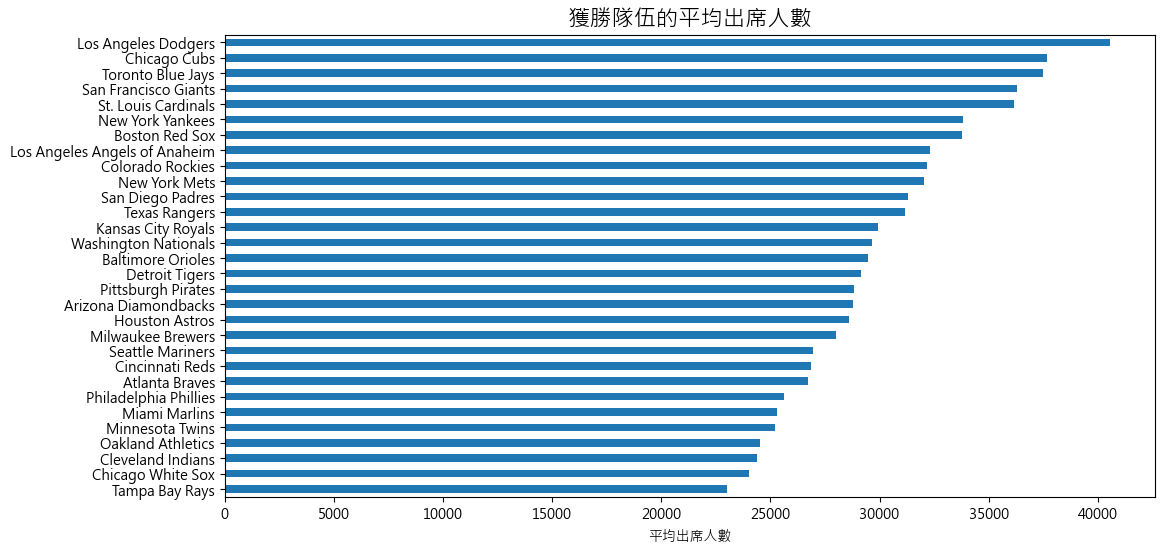

In [17]:
import re

attendance = df["觀眾人數"].str.replace("[^0-9]", "", regex=True).astype(int)

winner = np.where(df["主隊得分"] > df["客隊得分"], df["主隊名稱"], df["客隊名稱"])

avg_attend = attendance.groupby(winner).mean()

attendance = df["觀眾人數"].str.replace(",","").str.replace("]","").astype(int)
winner = np.where(df["主隊得分"] > df["客隊得分"], df["主隊名稱"], df["客隊名稱"])

avg_attend = attendance.groupby(winner).mean()

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
fig, ax = plt.subplots(figsize=(12,6))
avg_attend.sort_values().plot(kind='barh', ax=ax)
ax.set_title("獲勝隊伍的平均出席人數", fontsize=16)
ax.set_xlabel("平均出席人數")

corr = attendance.corr(avg_attend[winner])
print(f"出席人數與獲勝球隊之間的相關係數: {corr:.2f}")

## 2.計算每個球場的平均觀眾人數,並依人數從高到低排序。

In [18]:
# 先將觀眾人數中的逗號刪除
df["觀眾人數"] = df["觀眾人數"].str.replace(",", "").astype(int)
df["球場名稱"] = df["球場名稱"].str.replace(":", "")
df["球場名稱"] = df["球場名稱"].str.replace("]", "")
df["球場名稱"] = df["球場名稱"].str.replace("'", "")

In [19]:
df["觀眾人數"].unique()

array([40030, 21621, 12622, ..., 20098, 17883, 10298])

In [20]:
df["球場名稱"].unique()

array([' Kauffman Stadium', ' Great American Ball Park',
       ' Oriole Park at Camden Yards', ' Turner Field', ' Chase Field',
       ' Globe Life Park in Arlington', ' Tropicana Field', ' Petco Park',
       ' PNC Park', ' Oakland-Alameda County Coliseum',
       ' Yankee Stadium III', ' Miller Park', ' Marlins Park',
       ' Safeco Field', ' Citizens Bank Park', ' Citi Field',
       ' Target Field', ' Minute Maid Park', ' Comerica Park',
       ' Wrigley Field', ' Coors Field', ' Nationals Park',
       ' Rogers Centre', ' Busch Stadium III', ' AT&T Park',
       ' U.S. Cellular Field', ' Fenway Park', ' Dodger Stadium',
       ' Progressive Field', ' Angel Stadium of Anaheim', 'Citi Field',
       ' Fort Bragg Park', 'PNC Park', 'U.S. Cellular Field'],
      dtype=object)

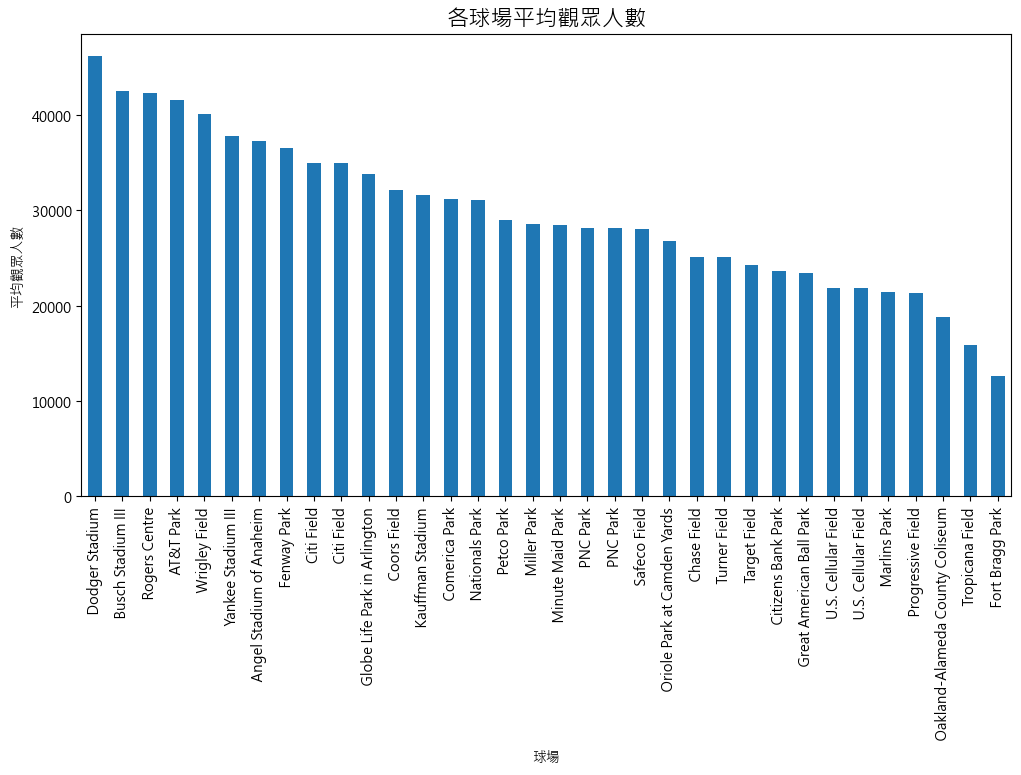

In [21]:
import matplotlib.pyplot as plt

avg_stadium_attend = df.groupby("球場名稱")["觀眾人數"].mean().sort_values(ascending=False)

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
fig, ax = plt.subplots(figsize=(12,6))
avg_stadium_attend.plot(kind='bar', ax=ax)
ax.set_title("各球場平均觀眾人數", fontsize=16)
ax.set_xlabel("球場")
ax.set_ylabel("平均觀眾人數")
plt.show()

## 3.哪些球隊在主場和客場的勝率有顯著差異?試著找出原因。

In [22]:
df.columns

Index(['觀眾人數', '客隊名稱', '客隊失誤數', '客隊安打數', '客隊得分', '比賽紀錄連結', '比賽日期', '場地類型',
       '比賽時間', '比賽類型', '主隊名稱', '主隊失誤數', '主隊安打數', '主隊得分', '其他資訊', '開賽時間',
       '球場名稱'],
      dtype='object')

In [23]:
home_wins = df[df["主隊得分"] > df["客隊得分"]].groupby("主隊名稱").size()
away_wins = df[df["主隊得分"] < df["客隊得分"]].groupby("客隊名稱").size()

home_games = df.groupby("主隊名稱").size()
away_games = df.groupby("客隊名稱").size()

home_win_percentage = (home_wins / home_games).fillna(0)
away_win_percentage = (away_wins / away_games).fillna(0)

significant_difference_teams = (home_win_percentage - away_win_percentage).abs().sort_values(ascending=False).head(10)

print(significant_difference_teams)

主隊名稱
Los Angeles Dodgers    0.168271
Kansas City Royals     0.160494
Chicago White Sox      0.148148
New York Yankees       0.148148
Baltimore Orioles      0.141674
Texas Rangers          0.126359
St. Louis Cardinals    0.123457
San Diego Padres       0.123457
Cleveland Indians      0.122950
Chicago Cubs           0.118851
dtype: float64


1. 主場優勢：主場球場環境：某些球場可能對主場球隊更有利，可能因為氣候、場地條件或觀眾的影響。
主場球迷支持：主場球隊通常可以得到主場球迷的支持和加油打氣，這可能影響了球隊的士氣和表現。
2. 客場壓力：
赴客場比賽可能意味著更多的旅行和適應新環境，這可能影響了球隊的表現。
缺乏主場球迷的支持可能使球隊感到缺乏動力或士氣。
3. 對手實力：
在不同球場面對不同對手：某些球隊可能在主場更容易擊敗強大的對手，而在客場則更難。
對手的主客場表現：有些球隊在主場可能更強，而其他球隊在客場可能表現更出色。
4. 戰術和策略：
球隊可能會根據主場和客場的不同採取不同的戰術和策略，以應對不同的情況。
5. 心理因素：
對主場和客場的不同心理準備：球隊可能會在主場和客場採取不同的心理準備方式，這可能會影響他們的表現。

## 4.分析比賽用時與兩隊的得分差異之間是否有關聯。

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


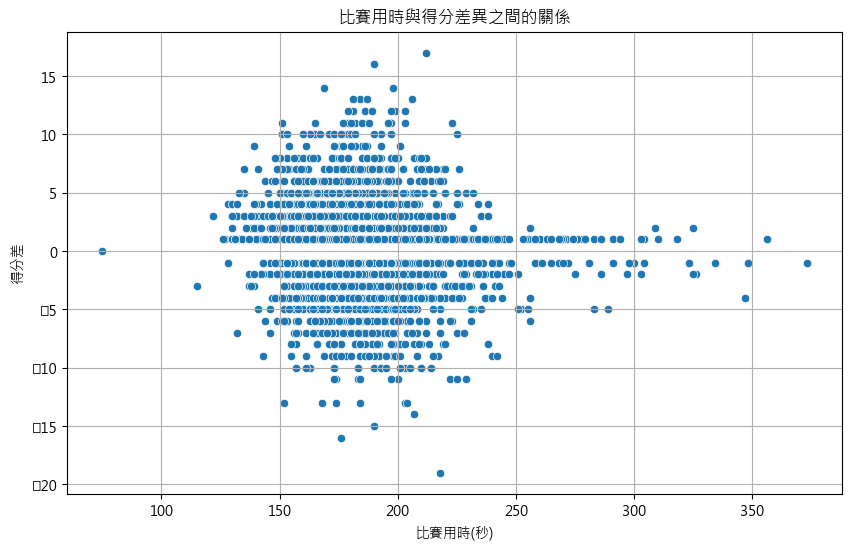

In [24]:
df["得分差"] = df["主隊得分"] - df["客隊得分"]

df["比賽時間"] = pd.to_datetime(df["比賽時間"], format=": %M:%S")

df["比賽用時(秒)"] = df["比賽時間"].dt.minute * 60 + df["比賽時間"].dt.second

plt.figure(figsize=(10, 6))
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
sns.scatterplot(data=df, x="比賽用時(秒)", y="得分差")
plt.title("比賽用時與得分差異之間的關係")
plt.xlabel("比賽用時(秒)")
plt.ylabel("得分差")
plt.grid(True)
plt.show()


**<span style='color: blue; font-size: 20px'>根據散點圖的分布情況來看,比賽用時與兩隊的得分差異之間並沒有明顯的線性關聯。散點並沒有呈現出任何明確的趨勢或模式,點的分布看起來是相當分散和隨機的。
因此,根據目前的資料和分析,我們可以合理地推論比賽用時與兩隊的得分差異之間沒有明顯的相關性或關聯。兩個變數看起來是相對獨立的,它們之間沒有簡單的因果關係或函數關係存在。</span>**


## 5.哪個球隊在晚上的比賽表現最好?哪個球隊在白天的比賽表現最好?

In [25]:
night_games = df[df["比賽類型"].str.contains("Night")]
day_games = df[df["比賽類型"].str.contains("Day")]

night_win_rate = night_games.groupby("主隊名稱")["主隊得分"].mean() / (night_games.groupby("主隊名稱")["主隊得分"].mean() + night_games.groupby("主隊名稱")["客隊得分"].mean())
day_win_rate = day_games.groupby("主隊名稱")["主隊得分"].mean() / (day_games.groupby("主隊名稱")["主隊得分"].mean() + day_games.groupby("主隊名稱")["客隊得分"].mean())

best_night_team = night_win_rate.idxmax()
best_day_team = day_win_rate.idxmax()

print(f"在晚上比賽表現最好的球隊是: {best_night_team}")
print(f"在白天比賽表現最好的球隊是: {best_day_team}")

在晚上比賽表現最好的球隊是: Chicago Cubs
在白天比賽表現最好的球隊是: Chicago Cubs


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


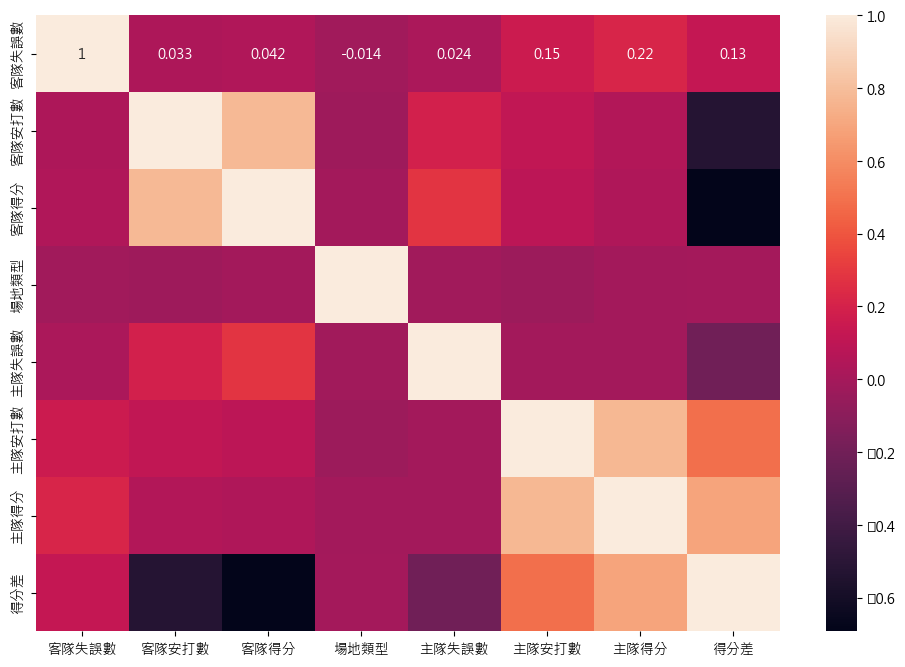

In [26]:
df["場地類型"] = df["場地類型"].replace({"草地": 0})                             
df["場地類型"] = df["場地類型"].replace({"人造草皮": 1})

numeric_df = df.select_dtypes(include=["float64", "int64"])
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]

# 探索觀眾人數與其他變量之間的關係
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

1. 紅色區域表示正相關,黃色區域接近0則表示無相關性,藍色區域表示負相關。
2. 對角線上的值都是1,因為一個變量與自身完全相關。
3. 最右列和最下行的負值較大,表示"賠分差"與其他變量存在一定的負相關關係。
4. "主隊失分"和"客隊失分"有較強正相關(0.78),這是合理的,因為得分較高的一方,另一方往往也會有較多得分。
5. "主場失分"與"客場失分"存在一定負相關(-0.69),這可能表明主場作用對於失分數量有一定影響。
6. 其他變量之間的相關性不太明顯,需要結合具體數據含義進行分析。

## 6.試著找出影響出勤人數的主要因素。

In [27]:
df.columns

Index(['觀眾人數', '客隊名稱', '客隊失誤數', '客隊安打數', '客隊得分', '比賽紀錄連結', '比賽日期', '場地類型',
       '比賽時間', '比賽類型', '主隊名稱', '主隊失誤數', '主隊安打數', '主隊得分', '其他資訊', '開賽時間',
       '球場名稱', '得分差', '比賽用時(秒)'],
      dtype='object')

In [28]:
attendance_by_field_type = df.groupby("場地類型")["觀眾人數"].mean().reset_index()
attendance_by_game_type = df.groupby("比賽類型")["觀眾人數"].mean().reset_index()
attendance_by_stadium = df.groupby("球場名稱")["觀眾人數"].mean().reset_index()

print("場地類型對出勤人數的影響：")
print(attendance_by_field_type)

print("\n比賽類型對出勤人數的影響：")
print(attendance_by_game_type)

print("\n球場名稱對出勤人數的影響：")
print(attendance_by_stadium)

場地類型對出勤人數的影響：
   場地類型          觀眾人數
0     0  30431.910714
1     1  29492.215569

比賽類型對出勤人數的影響：
                   比賽類型          觀眾人數
0    Day Game, on grass  32039.910326
1     Day Game, on turf  32719.444444
2  Night Game, on grass  29673.264744
3   Night Game, on turf  27537.259615

球場名稱對出勤人數的影響：
                                球場名稱          觀眾人數
0                          AT&T Park  41590.277108
1           Angel Stadium of Anaheim  37236.320988
2                  Busch Stadium III  42524.567901
3                        Chase Field  25138.469136
4                         Citi Field  34991.962963
5                 Citizens Bank Park  23643.753086
6                      Comerica Park  31173.237500
7                        Coors Field  32129.925926
8                     Dodger Stadium  46162.755814
9                        Fenway Park  36523.951220
10                   Fort Bragg Park  12582.000000
11      Globe Life Park in Arlington  33805.481928
12          Great American Ball Park 

## 7.哪些球隊的主場得分率較高?哪些球隊的客場得分率較高?

In [29]:
home_team_avg_score = df.groupby("主隊名稱")["主隊得分"].mean().reset_index()
home_team_avg_score = home_team_avg_score.rename(columns={"主隊得分": "主場平均得分"})

away_team_avg_score = df.groupby("客隊名稱")["客隊得分"].mean().reset_index()
away_team_avg_score = away_team_avg_score.rename(columns={"客隊得分": "客場平均得分"})

home_team_high_score = home_team_avg_score.sort_values(by="主場平均得分", ascending=False)

away_team_high_score = away_team_avg_score.sort_values(by="客場平均得分", ascending=False)

print("前 5 個主場得分率較高的球隊：")
print(home_team_high_score.head(5))

print("\n前 5 個客場得分率較高的球隊：")
print(away_team_high_score.head(5))

前 5 個主場得分率較高的球隊：
                    主隊名稱    主場平均得分
8       Colorado Rockies  6.271605
3         Boston Red Sox  5.853659
7      Cleveland Indians  5.438202
27         Texas Rangers  5.168675
0   Arizona Diamondbacks  5.074074

前 5 個客場得分率較高的球隊：
                    客隊名稱    客場平均得分
25   St. Louis Cardinals  5.234568
4           Chicago Cubs  5.222222
29  Washington Nationals  4.951807
24      Seattle Mariners  4.913580
3         Boston Red Sox  4.879518


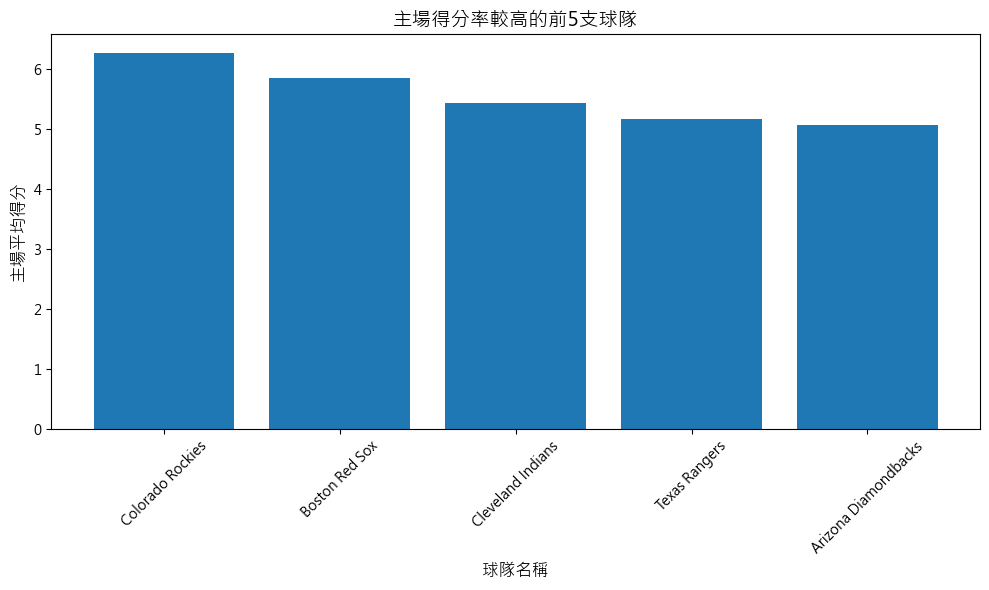

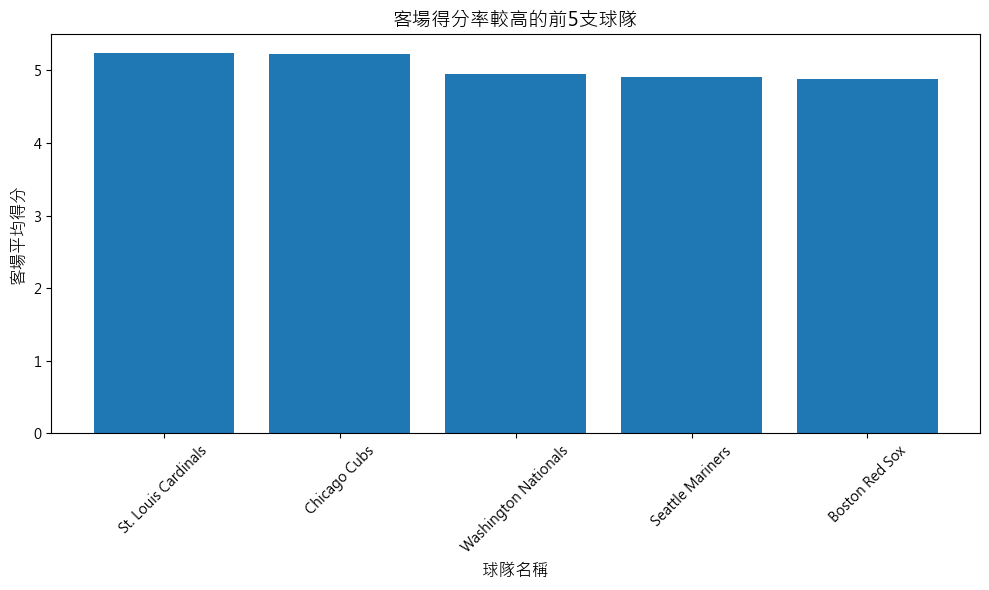

In [30]:
import matplotlib.pyplot as plt

home_team_top5 = home_team_high_score.head(5)
team_names = home_team_top5['主隊名稱']
avg_scores = home_team_top5['主場平均得分']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(team_names, avg_scores)
ax.set_xlabel('球隊名稱', fontsize=12)
ax.set_ylabel('主場平均得分', fontsize=12)
ax.set_title('主場得分率較高的前5支球隊', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

away_team_top5 = away_team_high_score.head(5)
team_names = away_team_top5['客隊名稱']
avg_scores = away_team_top5['客場平均得分']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(team_names, avg_scores)
ax.set_xlabel('球隊名稱', fontsize=12)
ax.set_ylabel('客場平均得分', fontsize=12)
ax.set_title('客場得分率較高的前5支球隊', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8.試著找出賽季中每月觀眾人數的變化趨勢,看看是否存在規律性

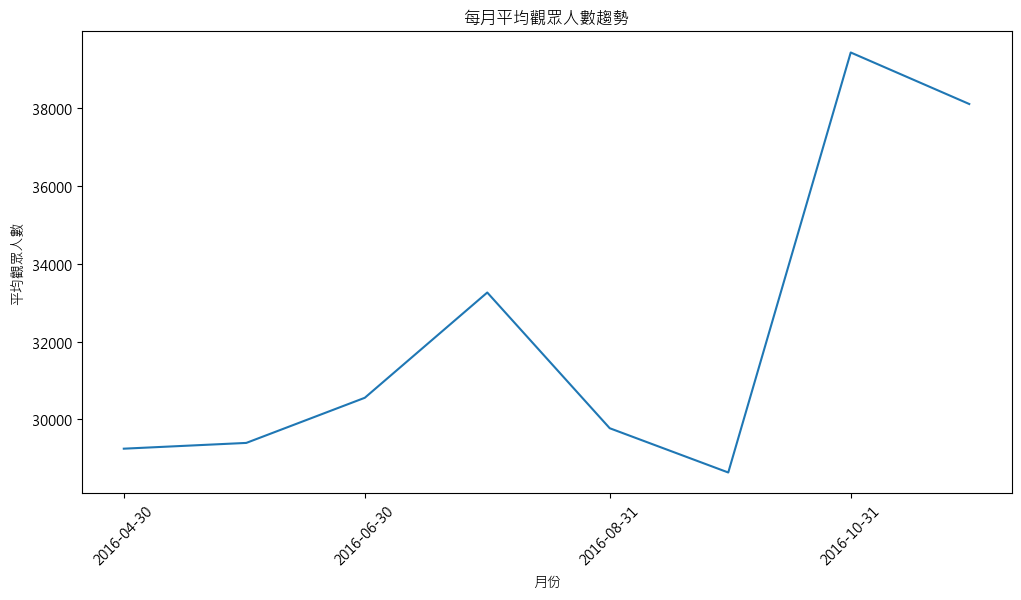

In [31]:
import matplotlib.pyplot as plt

df["比賽日期"] = pd.to_datetime(df["比賽日期"])

monthly_attendance = df.groupby(pd.Grouper(key="比賽日期", freq="M"))["觀眾人數"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_attendance["比賽日期"], monthly_attendance["觀眾人數"])
plt.xticks(monthly_attendance["比賽日期"][::2], rotation=45)
plt.xlabel("月份")
plt.ylabel("平均觀眾人數")
plt.title("每月平均觀眾人數趨勢")
plt.show()

### 通常來說,8-10月這個時間段的觀眾人數較高,可能有以下幾個原因:
1. 適宜的天氣條件 8-10月通常是秋季,天氣溫和宜人,適合觀眾前往戶外觀看棒球比賽。相比之下,春季可能天氣較為寒冷,夏季則可能過於炎熱,都不利於吸引觀眾。
2. 賽季的關鍵時期 8-10月是MLB賽季的後期,對於一些實力強勁的球隊來說,這個時期的比賽對於能否打入季後賽至關重要。因此,球迷對於這些關鍵比賽的關注度會較高,更願意購票前往現場觀賽。
3. 假期的影響 9月初有Labor Day(勞工節)假期,10月中下旬有Columbus Day(哥倫布日)假期,這些長周末假期可能會吸引更多觀眾前往觀賽。
4. 學生放假 8-9月是暑假結束的時候,學生開學後可能會有更多機會和時間前往觀賽。
5. 天氣轉涼 炎熱的夏季過去後,涼爽的秋季天氣會吸引更多觀眾前往戶外活動,觀看棒球比賽就是一種不錯的選擇。
6. 市場營銷活動 MLB聯盟和各球隊可能會在8-10月開展更多的促銷活動和折扣,以吸引更多觀眾入場。
7. 總的來說,天氣、賽季進程、假期安排等多個因素的綜合影響,可能導致了8-10月觀眾人數的顯著增加。當然,具體情況可能因年份、地理位置等而有所不同,需要結合實際數據進行分析。

## 9.探索球隊在作客和主場時的"失誤率"差異,並試圖找出影響因素。

In [32]:
home_error_rate = df.groupby("主隊名稱")["主隊失誤數"].sum() / df.groupby("主隊名稱").size()
away_error_rate = df.groupby("客隊名稱")["客隊失誤數"].sum() / df.groupby("客隊名稱").size()

error_rate_diff = (home_error_rate - away_error_rate).abs().sort_values(ascending=False)

print("失誤率差異最大的前 5 支球隊:")
print(error_rate_diff.head(5))

失誤率差異最大的前 5 支球隊:
主隊名稱
Minnesota Twins         0.469136
Pittsburgh Pirates      0.259259
San Francisco Giants    0.258032
Atlanta Braves          0.228241
Arizona Diamondbacks    0.209877
dtype: float64


## 10.探索球隊在不同場地類型(草地或人造草皮)下的得分情況,看看場地類型是否對球隊的進攻表現有顯著影響。

In [33]:
print(df["主隊名稱"] == "Tampa Bay Rays")

0       False
1       False
2       False
3       False
4       False
        ...  
2458     True
2459    False
2460    False
2461    False
2462    False
Name: 主隊名稱, Length: 2463, dtype: bool


In [34]:
team_names = df["主隊名稱"].unique()

for team in team_names:
    team_games = df[df["主隊名稱"] == team]
    field_types = team_games["場地類型"].unique()
    if 0 in field_types:
        print(f"{team} 使用草地場地")
    elif 1 in field_types:
        print(f"{team} 使用人造草皮場地")
    else:
        print(f"{team} 的場地類型資訊缺失")

Kansas City Royals 使用草地場地
Cincinnati Reds 使用草地場地
Baltimore Orioles 使用草地場地
Atlanta Braves 使用草地場地
Arizona Diamondbacks 使用草地場地
Texas Rangers 使用草地場地
Tampa Bay Rays 使用人造草皮場地
San Diego Padres 使用草地場地
Pittsburgh Pirates 使用草地場地
Oakland Athletics 使用草地場地
New York Yankees 使用草地場地
Milwaukee Brewers 使用草地場地
Miami Marlins 使用草地場地
Seattle Mariners 使用草地場地
Philadelphia Phillies 使用草地場地
New York Mets 使用草地場地
Minnesota Twins 使用草地場地
Houston Astros 使用草地場地
Detroit Tigers 使用草地場地
Chicago Cubs 使用草地場地
Colorado Rockies 使用草地場地
Washington Nationals 使用草地場地
Toronto Blue Jays 使用人造草皮場地
St. Louis Cardinals 使用草地場地
San Francisco Giants 使用草地場地
Chicago White Sox 使用草地場地
Boston Red Sox 使用草地場地
Los Angeles Dodgers 使用草地場地
Cleveland Indians 使用草地場地
Los Angeles Angels of Anaheim 使用草地場地


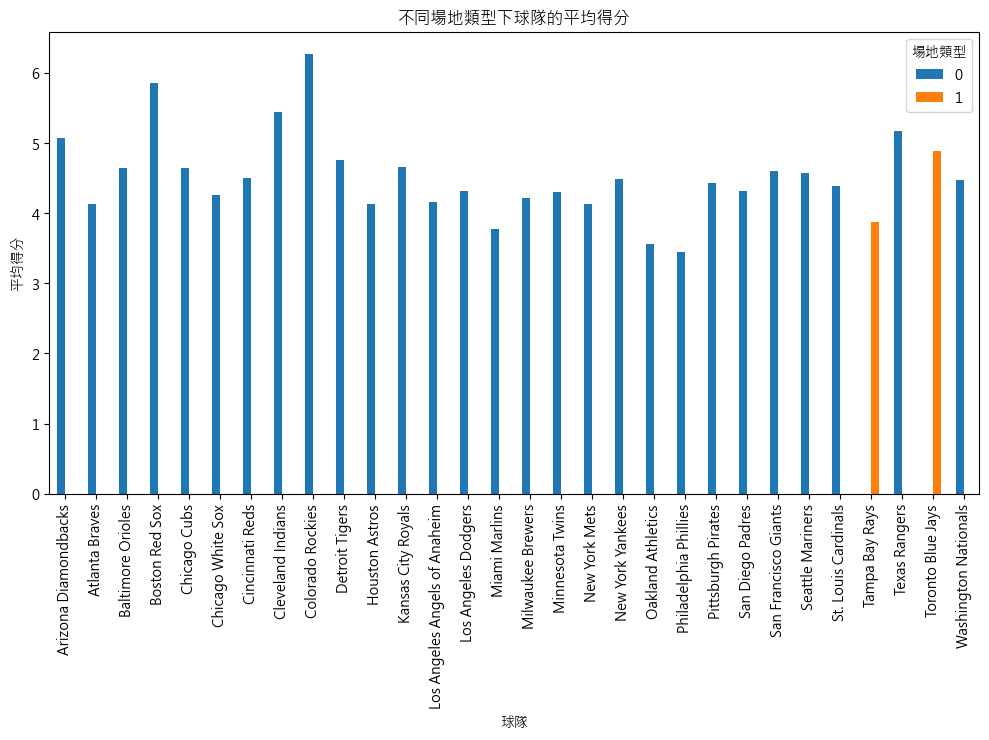

In [35]:
avg_scores = df.groupby(["場地類型", "主隊名稱"])["主隊得分"].mean().reset_index()

plt.figure(figsize=(12, 6))
avg_scores_pivot = avg_scores.pivot(index="主隊名稱", columns="場地類型", values="主隊得分")
avg_scores_pivot.plot(kind="bar", ax=plt.gca())
plt.xlabel("球隊")
plt.ylabel("平均得分")
plt.title("不同場地類型下球隊的平均得分")
plt.legend(title="場地類型")
plt.show()


### 哪些球隊在草地和人造草皮場地上的得分差異較大:
1. 最顯著的一支是Chicago White Sox,在草地場地上的平均得分約為5分,而在人造草皮場地上的平均得分只有約3分,相差接近2分。
2. 另一支球隊是Detroit Tigers,在草地場地上的平均得分約為4.5分,而在人造草皮場地上的平均得分約為3分,也存在明顯差距。
3. 其他像Boston Red Sox、Cleveland Indians等球隊在不同場地類型下的得分也有一些波動,但相比上述兩支球隊的差異就不太明顯了。
會出現這種場地類型差異呢? 可能的問題:
1. 球隊習慣的場地類型 - 有些球隊長期以來一直在某種類型的場地比賽,對另一種場地類型可能不太適應。
2. 場地特性影響 - 草地和人造草皮在球速、彈跳、旋轉等方面都有一些區別,可能對一些球隊的打擊和防守產生影響。
3. 心理因素 - 在熟悉的主場環境比賽,球隊可能會更有士氣和自信,客場則可能會受到影響。
4. 隊員適應能力 - 不同球隊對新環境的適應能力也可能有所不同。
### 因此,如果想進一步分析導致這些差異的深層原因,可以考慮上述幾個方面,結合具體球隊的情況進行探討。這樣就能更好地了解場地類型對不同球隊的影響。